Analyze revenue, losses, margins

Calculate burn rate and runway

Compute solvency and profitability ratios

# Reading the Financials dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime
import seaborn as sns

df = pd.read_csv(os.path.join('..', 'data', 'financials.csv'))

In [2]:
df.head()

,Year,Revenue_INR,EBITDA_INR,Net_Loss_INR,Employee_Costs_INR,Marketing_INR,Cash_on_Hand_INR
0,2017,250,10,-50,12,18,400
1,2018,520,25,-30,30,40,600
2,2019,1400,60,-83,60,70,1000
3,2020,2500,-100,-260,80,100,1500
4,2021,2400,-1000,-2300,500,1000,1300


In [4]:
df['Year'] = df['Year'].astype(str)
df.set_index('Year', inplace=True)
df.head()

,Revenue_INR,EBITDA_INR,Net_Loss_INR,Employee_Costs_INR,Marketing_INR,Cash_on_Hand_INR
Year,,,,,,
2017,250,10,-50,12,18,400
2018,520,25,-30,30,40,600
2019,1400,60,-83,60,70,1000
2020,2500,-100,-260,80,100,1500
2021,2400,-1000,-2300,500,1000,1300


# Plotting

###  Revenue vs Net Loss Plot

- **Revenue** is the total income earned by the company from its operations (like selling subscriptions or courses). 
- **Net Loss** is the amount of money the company loses after deducting all expenses including salaries, marketing, interest, and taxes.

####  
Between FY17 and FY22, BYJU’S revenue grew steadily from ₹250 Cr to ₹5000 Cr — an impressive rise.  
However, net losses grew even faster, reaching ₹4100 Cr in FY22. This suggests that BYJU’S was spending far more than it earned — scaling operations without achieving profitability.


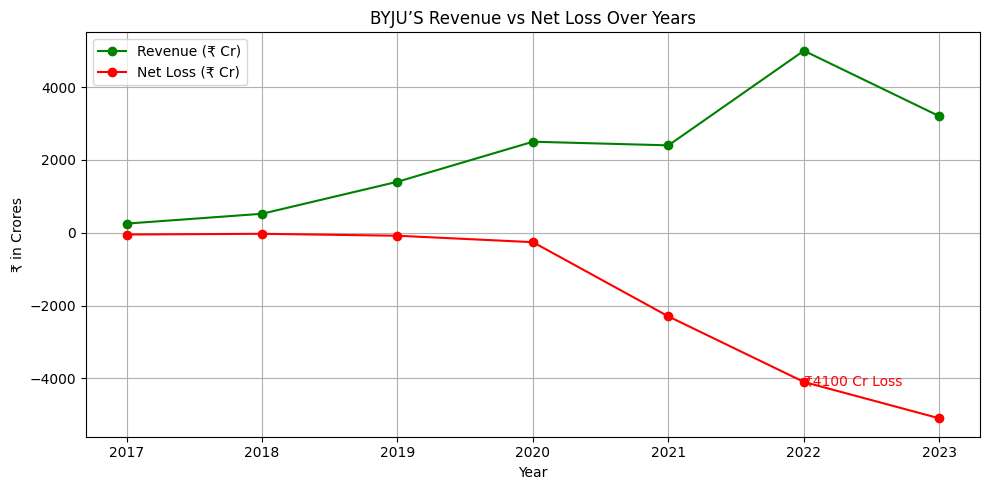

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Revenue_INR'], marker='o', label='Revenue (₹ Cr)', color='green')
plt.plot(df.index, df['Net_Loss_INR'], marker='o', label='Net Loss (₹ Cr)', color='red')

plt.text('2022', -4200, '₹4100 Cr Loss', color='red')

plt.title("BYJU’S Revenue vs Net Loss Over Years")
plt.xlabel("Year")
plt.ylabel("₹ in Crores")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

###  EBITDA Margin Plot

- **EBITDA** stands for Earnings Before Interest, Taxes, Depreciation, and Amortization. It reflects how profitable the core operations of a company are, without accounting for financial or accounting adjustments.
- **EBITDA Margin (%)** is calculated as EBITDA ÷ Revenue × 100. A positive margin means operations are profitable; a negative margin means losses from core activities.

####  Observation:
BYJU’S had negative EBITDA margins from FY20 onward, reaching nearly -40% in FY22.  
This means their business model was unsustainable even before accounting for interest or taxes — a major red flag for investors.


In [7]:
df['EBITDA_Margin_%'] = (df['EBITDA_INR'] / df['Revenue_INR']) * 100

df.head()

,Revenue_INR,EBITDA_INR,Net_Loss_INR,Employee_Costs_INR,Marketing_INR,Cash_on_Hand_INR,EBITDA_Margin_%
Year,,,,,,,
2017,250,10,-50,12,18,400,4.000000
2018,520,25,-30,30,40,600,4.807692
2019,1400,60,-83,60,70,1000,4.285714
2020,2500,-100,-260,80,100,1500,-4.000000
2021,2400,-1000,-2300,500,1000,1300,-41.666667


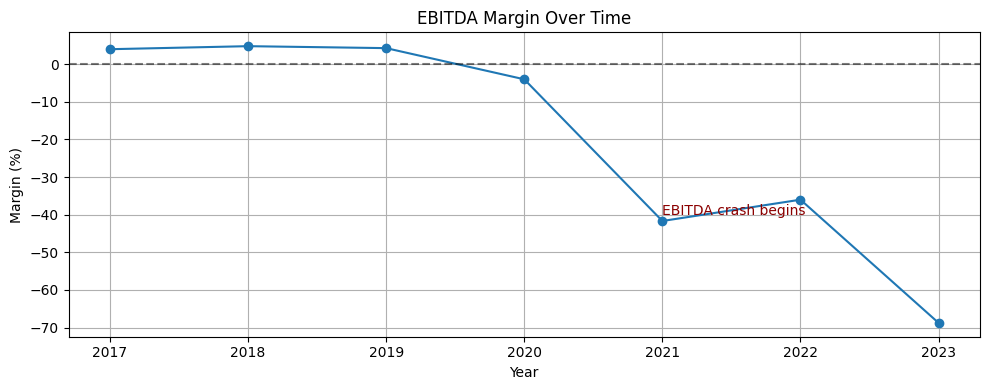

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(df.index, df['EBITDA_Margin_%'], marker='o')
plt.axhline(0, linestyle='--', color='black', alpha=0.5)
plt.title("EBITDA Margin Over Time")
plt.ylabel("Margin (%)")
plt.xlabel("Year")
plt.grid(True)

plt.text('2021', -40, 'EBITDA crash begins', color='darkred')

plt.tight_layout()
plt.show()


###  Burn Rate & Runway Plot

- **Burn Rate** is the amount of cash a company is losing per month (Net Loss ÷ 12).
- **Cash Runway** tells you how long the company can survive before it runs out of money. It's calculated as:  
  Cash on Hand ÷ Monthly Burn Rate

####  Financial Red Flag:
In FY23, BYJU’S had only ₹300 Cr left and was losing ₹5100 Cr/year (~₹425 Cr/month).  
That gave them a runway of just ~7 months, putting the company at serious risk of collapse unless emergency funding arrived.


In [ ]:
df['Burn_Rate_Monthly'] = df['Net_Loss_INR'] / 12
df['Runway_Months'] = df['Cash_on_Hand_INR'] / df['Burn_Rate_Monthly']
df.head()

,Revenue_INR,EBITDA_INR,Net_Loss_INR,Employee_Costs_INR,Marketing_INR,Cash_on_Hand_INR,EBITDA_Margin_%,Burn_Rate_Monthly,Runway_Months
Year,,,,,,,,,
2017,250,10,-50,12,18,400,4.000000,-4.166667,-96.000000
2018,520,25,-30,30,40,600,4.807692,-2.500000,-240.000000
2019,1400,60,-83,60,70,1000,4.285714,-6.916667,-144.578313
2020,2500,-100,-260,80,100,1500,-4.000000,-21.666667,-69.230769
2021,2400,-1000,-2300,500,1000,1300,-41.666667,-191.666667,-6.782609


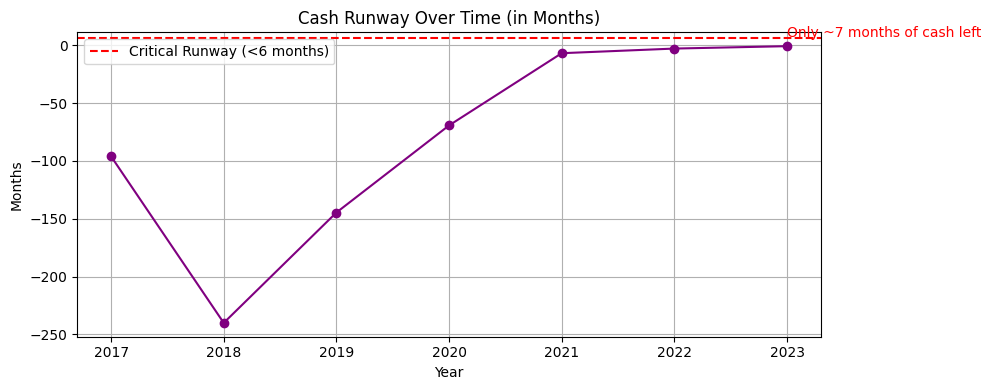

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(df.index, df['Runway_Months'], marker='o', color='purple')
plt.axhline(6, color='red', linestyle='--', label='Critical Runway (<6 months)')
plt.title("Cash Runway Over Time (in Months)")
plt.ylabel("Months")
plt.xlabel("Year")

plt.text('2023', 7, 'Only ~7 months of cash left', color='red')

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

###  Cost Structure Plot

- **Employee Costs** include salaries, benefits, bonuses, and ESOPs for staff.
- **Marketing Spend** includes advertisements (TV, YouTube), sponsorships, influencer deals, etc.

####  Insight:
While employee costs grew steadily, marketing expenses skyrocketed — peaking at ₹1500 Cr in FY22.  
BYJU’S spent nearly 30% of its revenue just on ads, showing it relied heavily on aggressive customer acquisition even during financial stress.


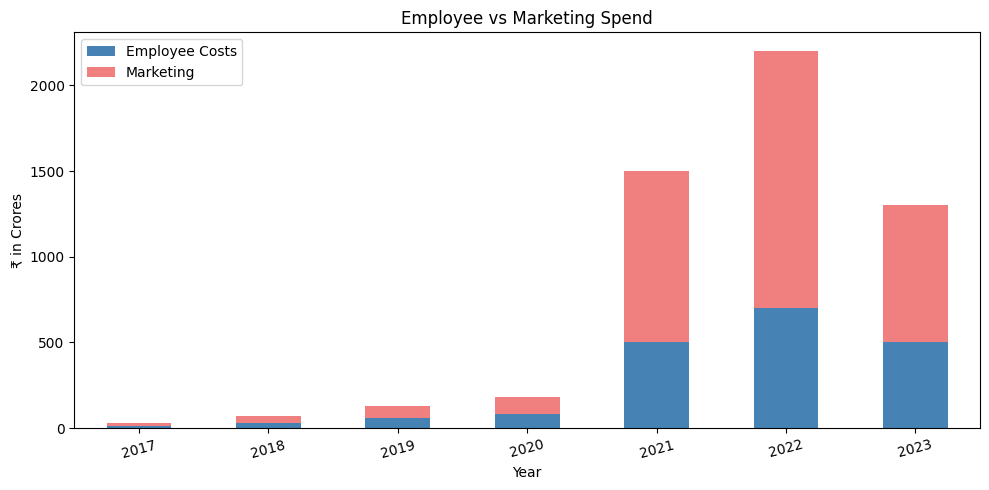

In [ ]:
df[['Employee_Costs_INR', 'Marketing_INR']].plot( kind='bar', figsize=(10, 5), stacked=True, color=['steelblue', 'lightcoral'])
plt.title("Employee vs Marketing Spend")
plt.ylabel("₹ in Crores")
plt.xlabel("Year")
plt.xticks(rotation=15)
plt.legend(["Employee Costs", "Marketing"])
plt.tight_layout()
plt.show()